### CHURN PREDICTION
Customer Churn is when customers leave a service in a given period of time, what is bad for business. This work has as objective to build a machine learning model to predict which customers will leave the service and the dataset used is the Telco Customer Churn, hosted at Kaggle. An Exploratory Data Analysis is made to a better understand the data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df =pd.read_excel("../Telco-Customer-Churn.xlsx")
df_=pd.read_excel("../Telco-Customer-Churn.xlsx")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [6]:
df.iloc[:5,-3:]

,MonthlyCharges,TotalCharges,Churn
0,29.85,29.85,No
1,56.95,1889.5,No
2,53.85,108.15,Yes
3,42.3,1840.75,No
4,70.7,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [8]:
df.describe() # show base statics for numeric columns

,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.162147,32.371149
std,0.368612,24.559481
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [9]:
df.loc[df.Churn=="No","Churn"]=0
df.loc[df.Churn=="Yes","Churn"]=1

df.head() 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,1


In [10]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [11]:
df.value_counts("Churn")

Churn
0    5174
1    1869
dtype: int64

In [12]:
df.groupby([df.gender,df.Churn,df.Contract]).count()["customerID"]

gender  Churn  Contract      
Female  0      Month-to-month    1083
               One year           643
               Two year           823
        1      Month-to-month     842
               One year            75
               Two year            22
Male    0      Month-to-month    1137
               One year           664
               Two year           824
        1      Month-to-month     813
               One year            91
               Two year            26
Name: customerID, dtype: int64

In [13]:
df_.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


### CHURN DISTRIBUTION
The Client Churn Distribution is checked for any imbalance, as the feature is the target, it's important to choose what strategy to adopt when dealing with imbalanced classes. Below, a Pie Chart shows the feature distribution.

In [14]:
df_.dtypes[df_.dtypes=="object"] # Returns columns whose column values are objects

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [15]:
df_.dtypes[df_.dtypes!="object"]# Returns columns whose column values are non objects

SeniorCitizen    int64
tenure           int64
dtype: object

In [16]:
df_.dtypes[df_.dtypes!="object"].index

Index(['SeniorCitizen', 'tenure'], dtype='object')

In [17]:
df_.dtypes[df_.dtypes!="object"].values

array([dtype('int64'), dtype('int64')], dtype=object)

In [18]:
char_cols=df.dtypes.pipe(lambda x: x[x=="object"] ).index
type(char_cols)


pandas.core.indexes.base.Index

In [20]:
for col in char_cols:
    print(col,"---",
          df.columns.get_loc(col),"--",type(col))

customerID --- 0 -- <class 'str'>
gender --- 1 -- <class 'str'>
Partner --- 3 -- <class 'str'>
Dependents --- 4 -- <class 'str'>
PhoneService --- 6 -- <class 'str'>
MultipleLines --- 7 -- <class 'str'>
InternetService --- 8 -- <class 'str'>
OnlineSecurity --- 9 -- <class 'str'>
OnlineBackup --- 10 -- <class 'str'>
DeviceProtection --- 11 -- <class 'str'>
TechSupport --- 12 -- <class 'str'>
StreamingTV --- 13 -- <class 'str'>
StreamingMovies --- 14 -- <class 'str'>
Contract --- 15 -- <class 'str'>
PaperlessBilling --- 16 -- <class 'str'>
PaymentMethod --- 17 -- <class 'str'>
MonthlyCharges --- 18 -- <class 'str'>
TotalCharges --- 19 -- <class 'str'>
Churn --- 20 -- <class 'str'>


In [21]:
df.columns,

(Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object'),)

In [22]:
df.index

RangeIndex(start=0, stop=7043, step=1)

In [23]:

pd.factorize(df["SeniorCitizen"])

(array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 Int64Index([0, 1], dtype='int64'))

In [24]:

np.unique(pd.factorize(df["SeniorCitizen"])[0],
                            return_counts=True)


(array([0, 1], dtype=int64), array([5901, 1142], dtype=int64))

In [25]:
from collections import Counter
Counter(pd.factorize(df["SeniorCitizen"])[0])

Counter({0: 5901, 1: 1142})

In [26]:
char_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
for c in char_cols :  # we doing change  each uniqe categorical columns value to integer vlaue .actually we perform label encoder
    df[c]= pd.factorize(df[c])[0]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,1,1,0
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,2,2,1
3,3,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,3,3,0
4,4,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,4,4,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        7043 non-null   int64
 1   gender            7043 non-null   int64
 2   SeniorCitizen     7043 non-null   int64
 3   Partner           7043 non-null   int64
 4   Dependents        7043 non-null   int64
 5   tenure            7043 non-null   int64
 6   PhoneService      7043 non-null   int64
 7   MultipleLines     7043 non-null   int64
 8   InternetService   7043 non-null   int64
 9   OnlineSecurity    7043 non-null   int64
 10  OnlineBackup      7043 non-null   int64
 11  DeviceProtection  7043 non-null   int64
 12  TechSupport       7043 non-null   int64
 13  StreamingTV       7043 non-null   int64
 14  StreamingMovies   7043 non-null   int64
 15  Contract          7043 non-null   int64
 16  PaperlessBilling  7043 non-null   int64
 17  PaymentMethod     7043 non-null  

In [29]:
df.groupby("gender").describe().iloc[:,:8]

customerID                                                           \
            count         mean          std  min      25%     50%      75%   
gender                                                                       
0          3488.0  3537.815367  2035.062389  0.0  1772.25  3569.5  5285.75   
1          3555.0  3504.501547  2031.687231  1.0  1750.00  3495.0  5270.50   

                
           max  
gender          
0       7040.0  
1       7042.0

In [30]:
df.groupby("gender").describe()[:2]

customerID                                                           \
            count         mean          std  min      25%     50%      75%   
gender                                                                       
0          3488.0  3537.815367  2035.062389  0.0  1772.25  3569.5  5285.75   
1          3555.0  3504.501547  2031.687231  1.0  1750.00  3495.0  5270.50   

               SeniorCitizen            ... TotalCharges           Churn  \
           max         count      mean  ...          75%     max   count   
gender                                  ...                                
0       7040.0        3488.0  0.162844  ...      4800.25  6526.0  3488.0   
1       7042.0        3555.0  0.161463  ...      4772.50  6528.0  3555.0   

                                                     
            mean       std  min  25%  50%  75%  max  
gender                                               
0       0.269209  0.443612  0.0  0.0  0.0  1.0  1.0  
1       0.261603  0.439570  0.0  0.0  0.0  1.0  1.0  

[2 rows x 160 columns]

In [31]:

df.groupby("gender").mean()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,,,,,,,,,,,,,,,,,,,,
0,3537.815367,0.162844,0.516055,0.294725,32.244553,0.905103,1.331135,0.873567,0.722764,0.862672,0.773222,0.722764,0.816800,0.821388,0.690367,0.401950,1.321674,565.440654,3180.100631,0.269209
1,3504.501547,0.161463,0.517862,0.304360,32.495359,0.901266,1.318987,0.872293,0.717300,0.880731,0.781153,0.724332,0.818565,0.821097,0.690577,0.413502,1.309705,559.517862,3134.703516,0.261603


In [32]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,1,1,0
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,2,2,1
3,3,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,3,3,0
4,4,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,0,1,24,1,2,0,1,...,1,1,1,1,1,0,1,295,6524,0
7039,7039,0,0,0,1,72,1,2,1,0,...,1,0,1,1,1,0,3,760,6525,0
7040,7040,0,0,0,1,11,0,0,0,1,...,0,0,0,0,0,0,0,204,6526,0
7041,7041,1,1,0,0,4,1,2,1,0,...,0,0,0,0,0,0,1,113,6527,1


### EXPLORATORY DATA ANALYSIS
Exploratory Data Analysis The goal of this section is to understand with our data. We will do bivariate analysis. We'll examine how each variable relates to the churn rate. 

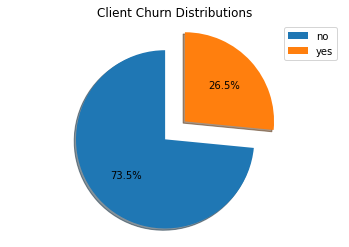

In [33]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels="no","yes"
sizes=[5174,1869]
explode = (0, 0.3)  # only "explode" the 2nd slice (i.e. 'yes')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Client Churn Distributions")
ax1.legend(labels)
plt.show()

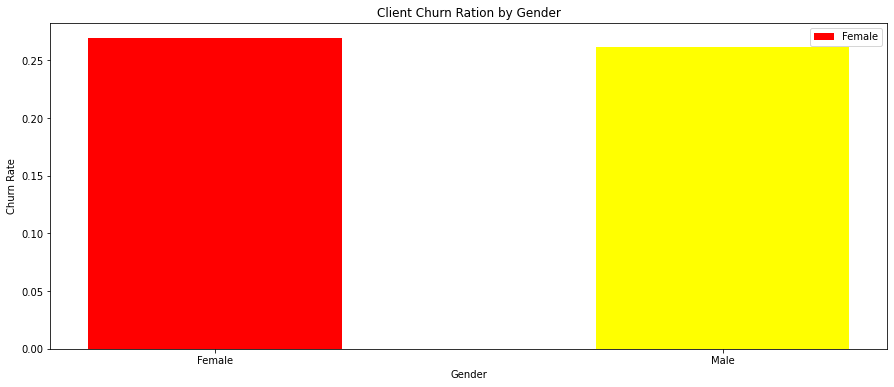

In [34]:
# create a dataset
Churn_Mean = [0.269209, 0.261603]
Gender = ('Female', 'Male')
x_pos = np.arange(len(Churn_Mean))

# Create bars with different colors
plt.figure(figsize=(15,6))
plt.bar(x_pos, Churn_Mean,width=0.5, color=['red','yellow'])

# Create names on the x-axis
plt.xticks(x_pos, Gender)

# Add title and axis names
plt.title('Client Churn Ration by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.legend(("Female","Male"))

# Show graph
plt.show()

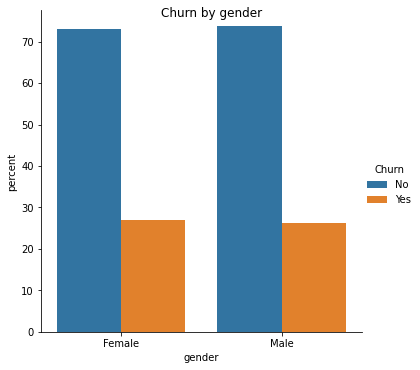

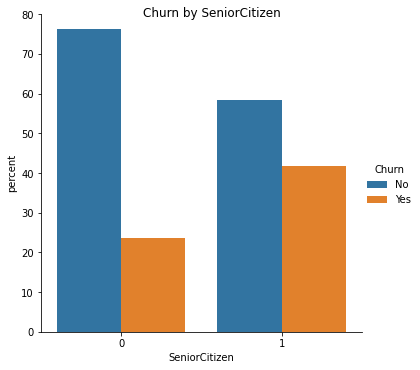

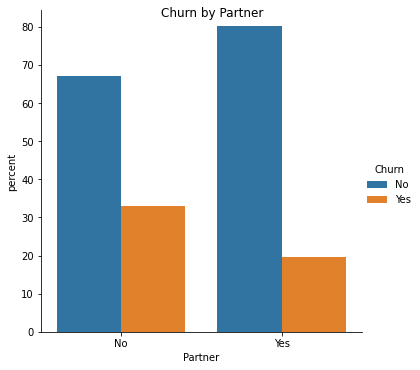

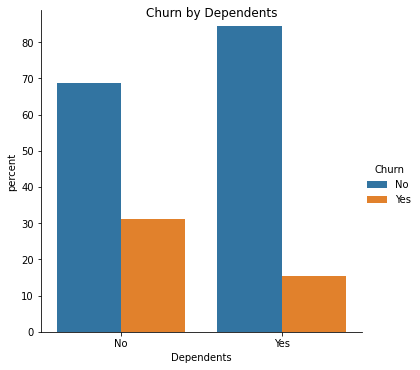

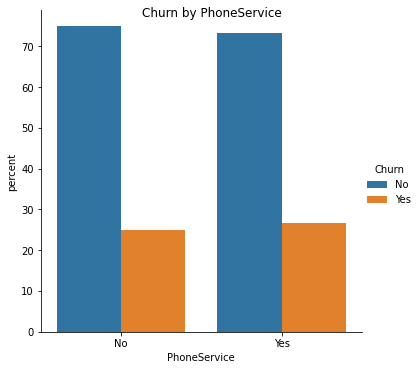

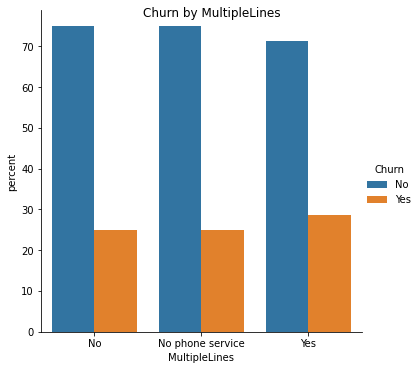

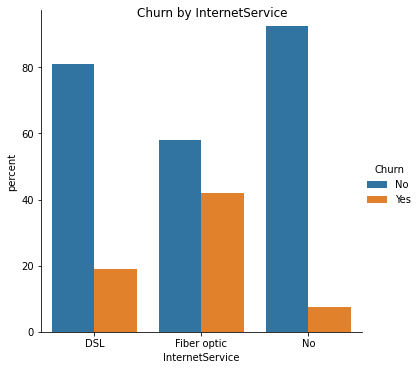

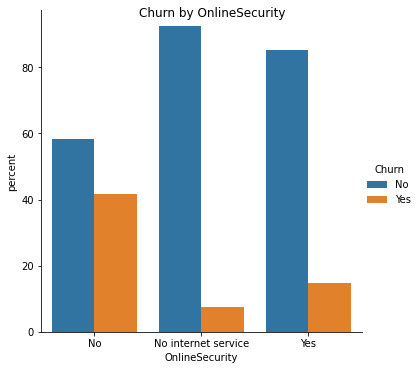

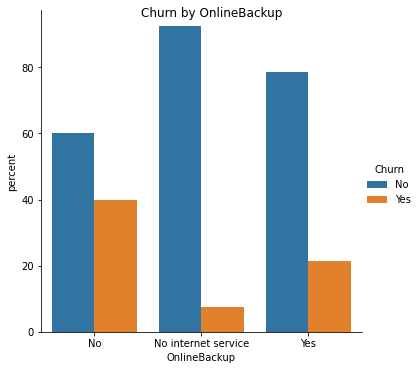

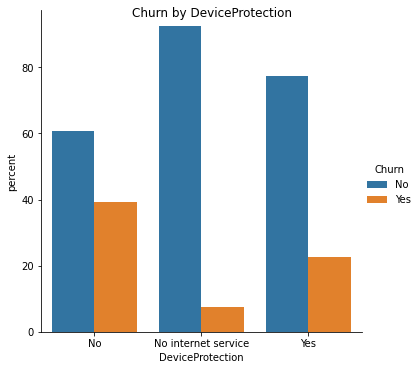

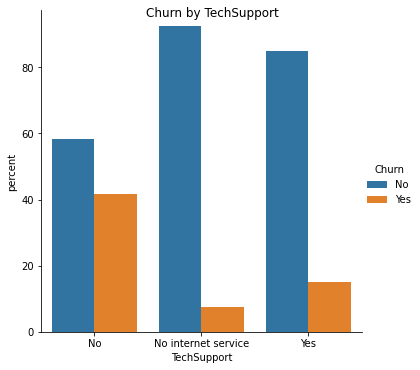

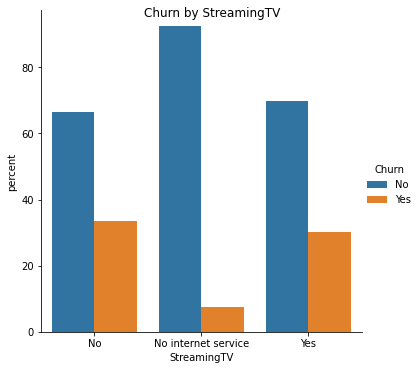

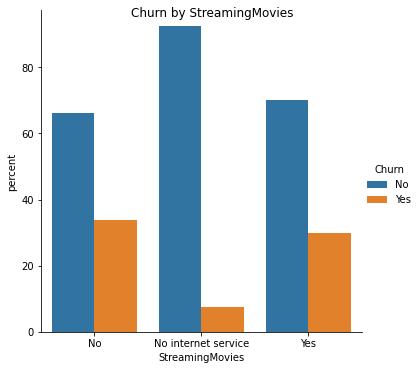

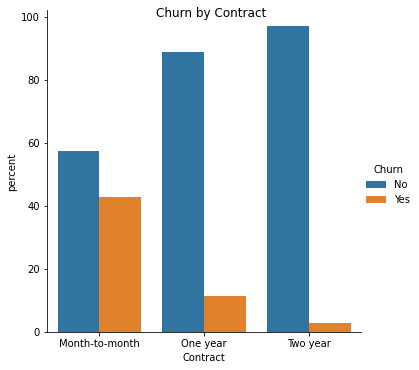

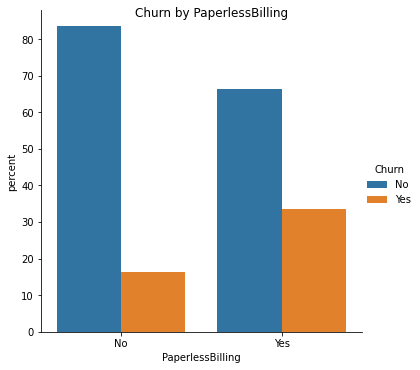

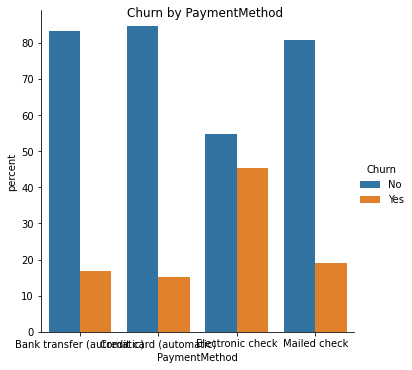

In [35]:
catvars = df_.columns.tolist()
catvars = [e for e in catvars if e not in ('TotalCharges', 'MonthlyCharges', 
                                           'tenure', 'customerID', 'Churn')]

y = 'Churn'
for x in catvars:
    plot = df_.groupby(x)[y]\
        .value_counts(normalize=True).mul(100)\
        .rename('percent').reset_index()\
        .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')
    plot.fig.suptitle("Churn by " + x)
    plot

TENURE

One peak is customers who have been tenured for a very long time; the other peak is customers who joined very recently. We should assume tenure is in the unit of “months”, because this is how services are billed.You can find code below.

C:\Users\boyarmus\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

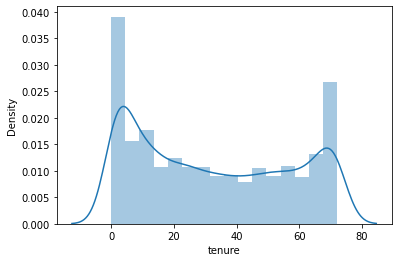

In [36]:
#Tenure
sns.distplot(df_.tenure)

CHURN BY TENURE

The first few months of tenure – between months 1-10 – seem to be critical, as this is when most of the churn is happening. There also seems to be a kind of diverging pattern in the middle. Maybe this is some kind of a survivor effect – members who make it past a certain tenure length are more likely to stick it out for the long-term.

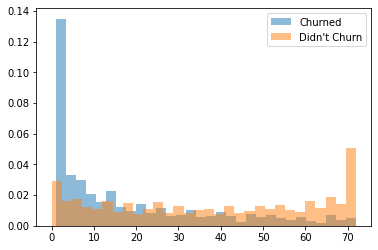

In [37]:
#Churn by tenure 
bins = 30
plt.hist(df_[df_.Churn == 'Yes'].tenure, 
         bins, alpha=0.5, density=True, label='Churned')
plt.hist(df_[df_.Churn == 'No'].tenure, 
         bins, alpha=0.5, density=True, label="Didn't Churn")
plt.legend(loc='upper right')
plt.show()

CLASSIFIER

Are there any strong correlations? We'll check out.

In [38]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,1,1,0
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,2,2,1
3,3,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,3,3,0
4,4,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,0,1,24,1,2,0,1,...,1,1,1,1,1,0,1,295,6524,0
7039,7039,0,0,0,1,72,1,2,1,0,...,1,0,1,1,1,0,3,760,6525,0
7040,7040,0,0,0,1,11,0,0,0,1,...,0,0,0,0,0,0,0,204,6526,0
7041,7041,1,1,0,0,4,1,2,1,0,...,0,0,0,0,0,0,1,113,6527,1


In [39]:
churners_number =len(df[df['Churn'] == 1])
print("Number of churners", churners_number)

churners = (df[df['Churn'] == 1])
# reprt of churn or not churn costumer number
df.value_counts("Churn")

Number of churners 1869


Churn
0    5174
1    1869
dtype: int64

In [40]:
non_churners = df[df['Churn'] == 0].sample(n=churners_number) 
print("Number of non-churners", len(non_churners))
df3 = churners.append(non_churners)

Number of non-churners 1869


In [41]:
def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

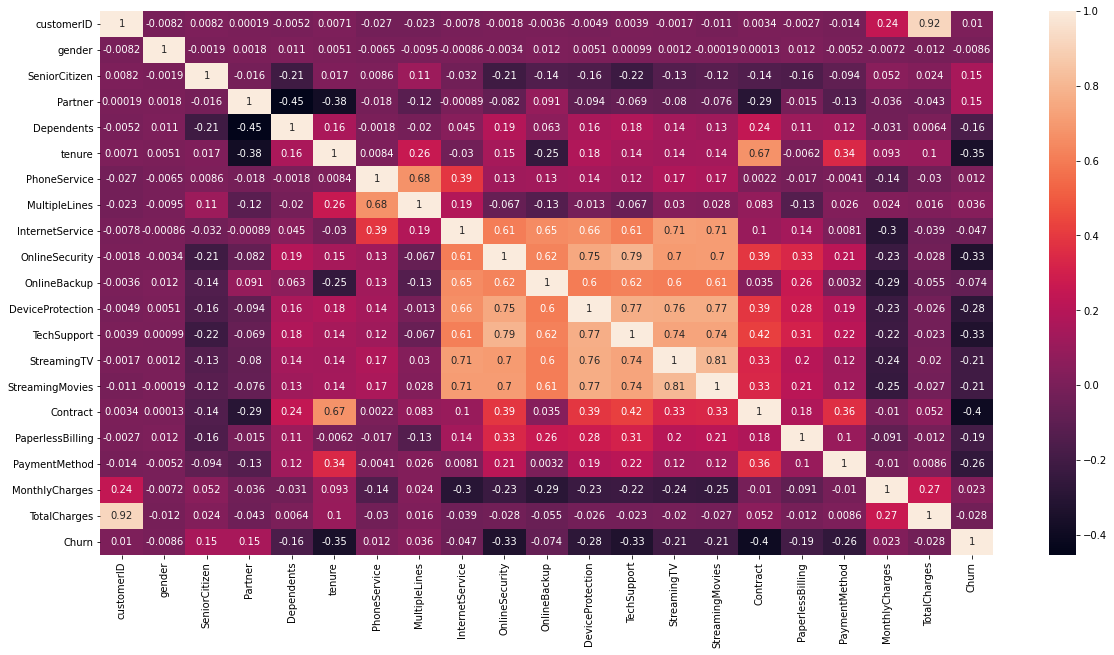

In [42]:
correlation_df = show_correlations(df,show_chart=True)

In [43]:
correlation_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,-0.008192,0.008170,0.000189,-0.005171,0.007150,-0.027049,-0.023091,-0.007824,-0.001836,...,-0.004869,0.003892,-0.001688,-0.011087,0.003361,-0.002741,-0.013593,0.240249,0.916100,0.010286
gender,-0.008192,1.000000,-0.001874,0.001808,0.010517,0.005106,-0.006488,-0.009451,-0.000863,-0.003429,...,0.005092,0.000985,0.001156,-0.000191,0.000126,0.011754,-0.005209,-0.007234,-0.011976,-0.008612
SeniorCitizen,0.008170,-0.001874,1.000000,-0.016479,-0.211185,0.016567,0.008576,0.113791,-0.032310,-0.210897,...,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,-0.156530,-0.093704,0.051650,0.024146,0.150889
Partner,0.000189,0.001808,-0.016479,1.000000,-0.452676,-0.379697,-0.017706,-0.117307,-0.000891,-0.081850,...,-0.094451,-0.069072,-0.080127,-0.075779,-0.294806,-0.014877,-0.133115,-0.035532,-0.042900,0.150448
Dependents,-0.005171,0.010517,-0.211185,-0.452676,1.000000,0.159712,-0.001762,-0.019657,0.044590,0.190523,...,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,-0.030526,0.006369,-0.164221
tenure,0.007150,0.005106,0.016567,-0.379697,0.159712,1.000000,0.008448,0.258958,-0.030359,0.145298,...,0.178649,0.144459,0.136145,0.140781,0.671607,-0.006152,0.340305,0.093377,0.101224,-0.352229
PhoneService,-0.027049,-0.006488,0.008576,-0.017706,-0.001762,0.008448,1.000000,0.675070,0.387436,0.125353,...,0.138755,0.123350,0.171538,0.165205,0.002247,-0.016505,-0.004070,-0.142019,-0.029998,0.011942
MultipleLines,-0.023091,-0.009451,0.113791,-0.117307,-0.019657,0.258958,0.675070,1.000000,0.186826,-0.066844,...,-0.013069,-0.066684,0.030195,0.028187,0.083343,-0.133255,0.025676,0.024395,0.015684,0.036310
InternetService,-0.007824,-0.000863,-0.032310,-0.000891,0.044590,-0.030359,0.387436,0.186826,1.000000,0.607788,...,0.662957,0.609795,0.712890,0.709020,0.099721,0.138625,0.008124,-0.296647,-0.039185,-0.047291
OnlineSecurity,-0.001836,-0.003429,-0.210897,-0.081850,0.190523,0.145298,0.125353,-0.066844,0.607788,1.000000,...,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.213800,-0.227620,-0.027784,-0.332819


In [44]:
# Define the target variable (dependent variable) 
y = df.Churn 
df = df.drop(['Churn'], axis= 1)

In [45]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,1,1
2,2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,2,2
3,3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,3,3
4,4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,295,6524
7039,7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,760,6525
7040,7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,204,6526
7041,7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,113,6527


BUİLD MODEL AND PREPROCESİNG

In [46]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.20)  

In [96]:
# Applying Support Vector Machine algorithm
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid', degree=8)  
svclassifier.fit(X_train, y_train)




SVC(degree=8, kernel='sigmoid')

In [97]:
# Predicting part, applying the model to predict
y_pred = svclassifier.predict(X_test)

 EVALUATING MODEL PERFORMANCE

Then we apply the Confusion Matrix method to understand how accurate our prediction is.
Precision shows how much of what we detect as churn is actually churned. Recall, on the other hand,
shows how much of the churn we actually guessed correctly.

The result shows us that the prediction is made at a good level. On average,
77% of the data gives the accuracy share, and 78% shows how accurately we estimate these labels we assign.

In [103]:
# Evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix 
con_max=confusion_matrix(y_test,y_pred)
len(y_pred),len(y_test)

(1409, 1409)

In [99]:
# we build  function of confusion matrix
def conf_mat(a,b,c,d):
    #                            tahminler  
    #a= TP             gerçekler  a|b
    #B= FN                        c|d   
    #C= FP
    #D= TN
    precision=a/(a+c) # dogru tahminlerden   kaçı gerçekte dogru
    recall=a/(a+b)    # geerçek dogrulardan kaçını dogru tahmin etmiş
    accuran=(a+d)/(a+b+c+d) # tüm degerlerin kaçını dogru tahmin etmiş
    f1_sc=2*precision*recall/(precision+recall)
    dictt={  "precision":precision,
            "recal":recall,
             "accurance": accuran,
             "F1 score " :f1_sc}
    return dictt

In [100]:
con_max[:,:]

array([[747, 300],
       [263,  99]], dtype=int64)

In [101]:
conf_mat(con_max[0,0],con_max[0,1],con_max[1,0],con_max[1,1])

{'precision': 0.7396039603960396,
 'recal': 0.7134670487106017,
 'accurance': 0.6004258339247693,
 'F1 score ': 0.7263004375303841}

In [102]:
print(con_max)  
print(classification_report(y_test,y_pred))

[[747 300]
 [263  99]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1047
           1       0.25      0.27      0.26       362

    accuracy                           0.60      1409
   macro avg       0.49      0.49      0.49      1409
weighted avg       0.61      0.60      0.61      1409

